<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Часть-1.-Приоритизация-гипотез" data-toc-modified-id="Часть-1.-Приоритизация-гипотез-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Часть 1. Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Приоритизация-гипотез.-Фреймворк-ICE" data-toc-modified-id="Приоритизация-гипотез.-Фреймворк-ICE-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Приоритизация гипотез. Фреймворк ICE</a></span></li><li><span><a href="#Приоритизация-гипотез.-Фреймворк-RICE" data-toc-modified-id="Приоритизация-гипотез.-Фреймворк-RICE-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Приоритизация гипотез. Фреймворк RICE</a></span></li></ul></li><li><span><a href="#Часть-2.-Анализ-A/B-теста" data-toc-modified-id="Часть-2.-Анализ-A/B-теста-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Часть 2. Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Поиск-явных-дубликатов" data-toc-modified-id="Поиск-явных-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Поиск явных дубликатов</a></span></li><li><span><a href="#Проверка-на-пересечение-пользователей-в-группах" data-toc-modified-id="Проверка-на-пересечение-пользователей-в-группах-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка на пересечение пользователей в группах</a></span></li><li><span><a href="#Анализ-кумулятивных-метрик" data-toc-modified-id="Анализ-кумулятивных-метрик-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ кумулятивных метрик</a></span></li><li><span><a href="#Анализ-выбросов-и-всплесков" data-toc-modified-id="Анализ-выбросов-и-всплесков-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ выбросов и всплесков</a></span></li><li><span><a href="#Расчет-статистической-значимости-различий-в-конверсии-и-среднем-чеке-между-группами" data-toc-modified-id="Расчет-статистической-значимости-различий-в-конверсии-и-среднем-чеке-между-группами-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Расчет статистической значимости различий в конверсии и среднем чеке между группами</a></span></li></ul></li><li><span><a href="#Принятие-решений-по-результатам-теста" data-toc-modified-id="Принятие-решений-по-результатам-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Принятие решений по результатам теста</a></span></li></ul></div>

# Описание проекта

Заказчик исследование - крупный интернет-магазин. Вместе с отделом маркетинга для нас подготовили список гипотез для увеличения выручки.

**Задачи проекта:**

- приоритизировать гипотезы;
- запустить A/B-тест и проанализировать результаты.

## Часть 1. Приоритизация гипотез

Первоначально импортируем необходимые библиотеки и сохраняем их в переменные, улучшаем качество изображения графиков и т.д.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn() # убираем предупреждения
    
%config InlineBackend.figure_format = 'retina' # улучшение четкости изображения

pd.set_option('display.max_columns', None) # уберем ограничение на вывод количества столбцов
pd.set_option("max_colwidth", 110) # установим максимальную ширину символов в столбце

Сохраним в переменную и выведем датафрейм.

In [2]:
# чтение файла с данными и сохранение в переменную 'hypothesis'
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv') 
except:
    hypothesis = pd.read_csv(r'D:\datasets\hypothesis.csv')


hypothesis # посмотрим

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Таблица hypothesis:**

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале (чем больше значение **Efforts**, тем дороже проверка гипотезы).

In [3]:
# преобразуем названия столбцов к нижнему регистру
hypothesis = hypothesis.rename(str.lower, axis='columns')

hypothesis.columns # проверим

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

### Приоритизация гипотез. Фреймворк ICE

Посчитаем ICE для гипотез. Для этого воспользуемся формулой:


$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [4]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'] # посчитаем

hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False) # отсортируем

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


**Промежуточные выводы:**

- наиболее перспективные гипотезы согласно методике **ICE**: **8**, **0**, **7**.

### Приоритизация гипотез. Фреймворк RICE

Посчитаем RICE для гипотез. Для этого воспользуемся формулой: 

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [5]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'] # посчитаем

hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False) # отсортируем

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Промежуточные выводы:**

- наиболее перспективные гипотезы согласно **RICE**: **7**, **2**, **0**;
- гипотеза **8** покинуло первое место при оценке методом **RICE**, так как значение охвата аудитории низок (равен **1**). При этом на втором месте появилась гипотеза **2** с высоким показателем **reach** равным **8**.

## Часть 2. Анализ A/B-теста

Сохраним в переменные и выведем первые 10 строк новых датафреймов.

In [6]:
# чтение файла с данными и сохранение в переменную 'orders'
try:
    orders = pd.read_csv('/datasets/orders.csv') 
except:
    orders = pd.read_csv(r'D:\datasets\orders.csv')

display(orders.head(10))

orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


**Таблица orders:**

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

In [7]:
# чтение файла с данными и сохранение в переменную 'visitors'
try:
    visitors = pd.read_csv('/datasets/visitors.csv') 
except:
    visitors = pd.read_csv(r'D:\datasets\visitors.csv')

display(visitors.head(10))

visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Таблица orders:**

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

**Наблюдения:**

- уберем заглавные буквы в названиях столбцов таблицы **orders**;
- изменим тип данных в столбцах **date** таблиц **orders** и **visitors** на **datetime**.

In [8]:
orders = orders.rename(str.lower, axis='columns') # уберем заглавные буквы в названиях столбцов

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) # заменим формат

print(orders.columns) # проверим

print(orders[['date']].dtypes, visitors[['date']].dtypes) # проверим

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')
date    datetime64[ns]
dtype: object date    datetime64[ns]
dtype: object


### Поиск явных дубликатов

Проверим на явные дубликаты таблицы **visitors** и **orders**.

In [9]:
print(f'Количество явных дубликатов в таблице: {visitors.duplicated().sum()}')

print(f'Количество явных дубликатов в таблице: {orders.duplicated().sum()}')

Количество явных дубликатов в таблице: 0
Количество явных дубликатов в таблице: 0


### Проверка на пересечение пользователей в группах

Выделим пользователей группы **А** и группы **В** таблицы **orders** и проверим на пересечение пользователей в группах.

In [10]:
users_a = orders.loc[orders['group'] == 'A', 'visitorid']
users_b = orders.loc[orders['group'] == 'B', 'visitorid'] # выделим пользователей двух групп

users_a = users_a.tolist()
users_b = users_b.tolist() # передадим значения в список

In [11]:
c = []
for i in users_a:
    if i in users_b:
        c.append(i) # проверим пересекаются ли значения в списках
        
print(len(c)) # посмотрим на количество пересекающихся значений

89


**89** значений - как минимум **178** строк в таблице **orders** с пользователями, которые фигурируют в обеих группах. Мы не можем отнести данных пользователей к определенной группе, поскольку нет никаких признаков. Поэтому удалим данных пользователей из таблицы **orders**.

In [12]:
orders = orders[np.logical_not(orders['visitorid'].isin(c))].reset_index().drop('index', axis=1) # удаляем

orders # проверим

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1011,3592955527,608641596,2019-08-14,16490,B
1012,2662137336,3733762160,2019-08-14,6490,B
1013,2203539145,370388673,2019-08-14,3190,A
1014,1807773912,573423106,2019-08-14,10550,A


### Анализ кумулятивных метрик

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм **cumulativedata**.

In [13]:
datesgroups = orders[['date','group']].drop_duplicates() # создаем массив уникальных пар значений дат и групп теста

ordersaggregated = (datesgroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                    .agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']))
# получим агрегированные кумулятивные по дням данные о заказах 

visitorsaggregated = (datesgroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group']))
# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина

cumulativedata = ordersaggregated.merge(visitorsaggregated, left_on=['date', 'group'], right_on=['date', 'group'])
# объединим кумулятивные данные в одной таблице

cumulativedata.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
# переименуем названия столбцов

cumulativedata # посмотрим

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


**Таблица cumulativedata:**

- `date` — дата;
- `group` — группа A/B-теста;
- `orders` — кумулятивное количество заказов на указанную дату в указанной группе;
- `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;;
- `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);;
- `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Сформируем два датафрейма с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах А и B.

In [14]:
cumulativerevenuea = cumulativedata[cumulativedata['group']=='A'][['date','revenue', 'orders']]
cumulativerevenueb = cumulativedata[cumulativedata['group']=='B'][['date','revenue', 'orders']]
# датафреймы для групп А и B

Построим график кумулятивной выручки по группам и дням.

C:\Users\airm\anaconda3\envs\praktikum\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


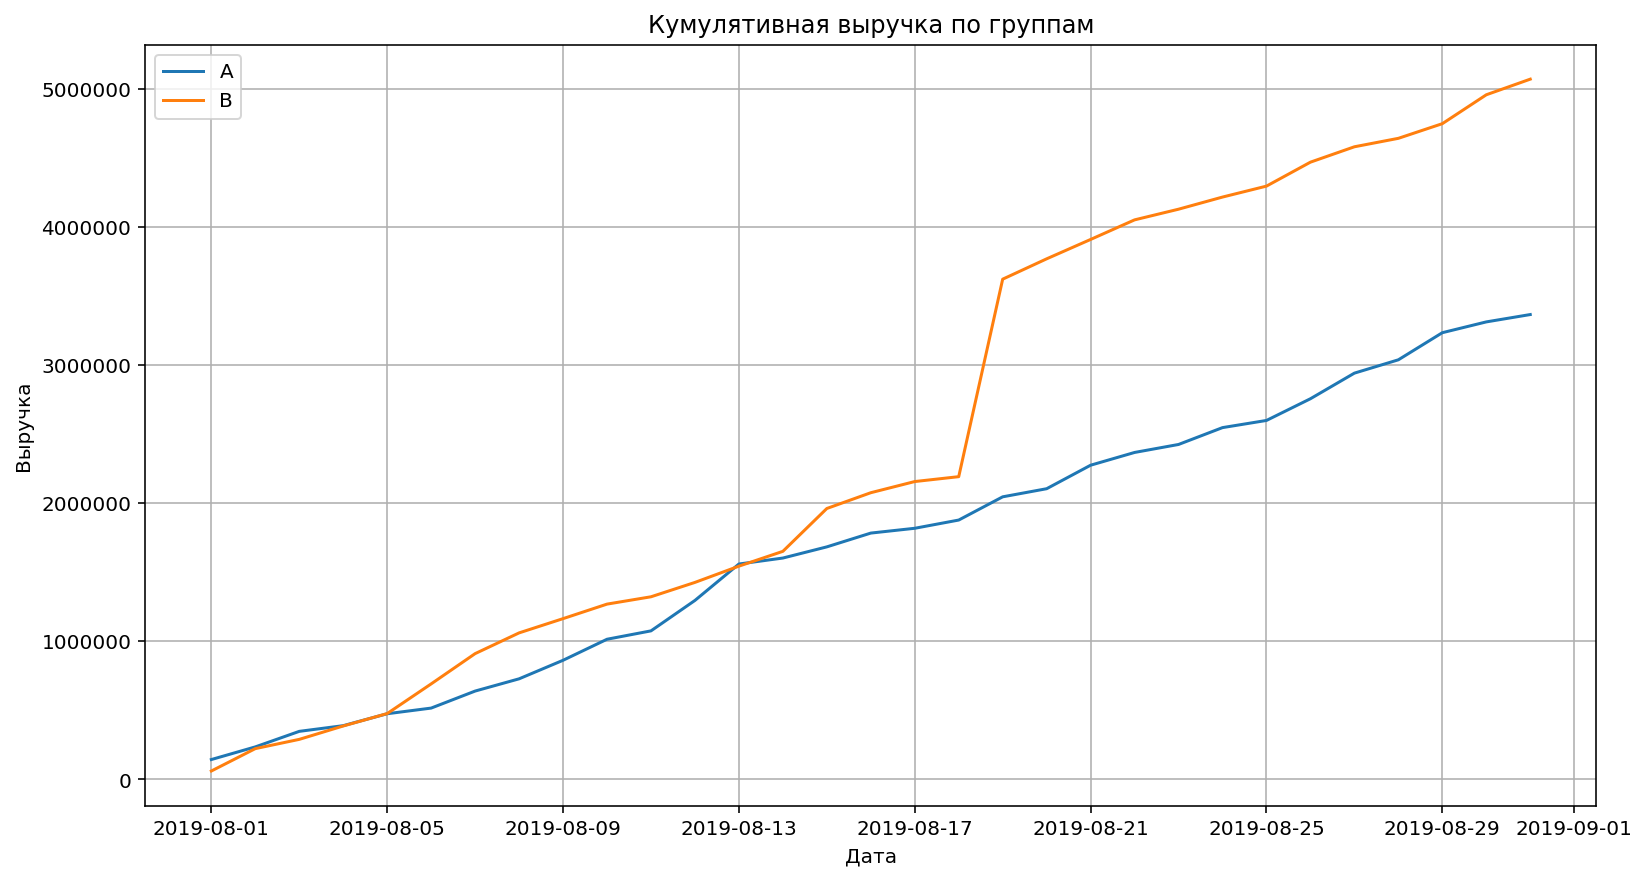

In [15]:
plt.figure(figsize=(13, 7))

plt.plot(cumulativerevenuea['date'], cumulativerevenuea['revenue'], label='A')
plt.plot(cumulativerevenueb['date'], cumulativerevenueb['revenue'], label='B')

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(which='major', axis='both')
plt.title('Кумулятивная выручка по группам')
plt.legend()
plt.show();

**Промежуточные выводы:**

- выручка у обоих групп увеличивается в течение всего теста;
- выручка у группы **B** **2019-08-18** резко выросла. Это может сигнализировать о всплесках числа заказов, либо появления очень дорогих заказов в выборке;
- график показал, что выручка группы **B** больше на протяжении всего теста.

Построим график кумулятивного среднего чека по группам.

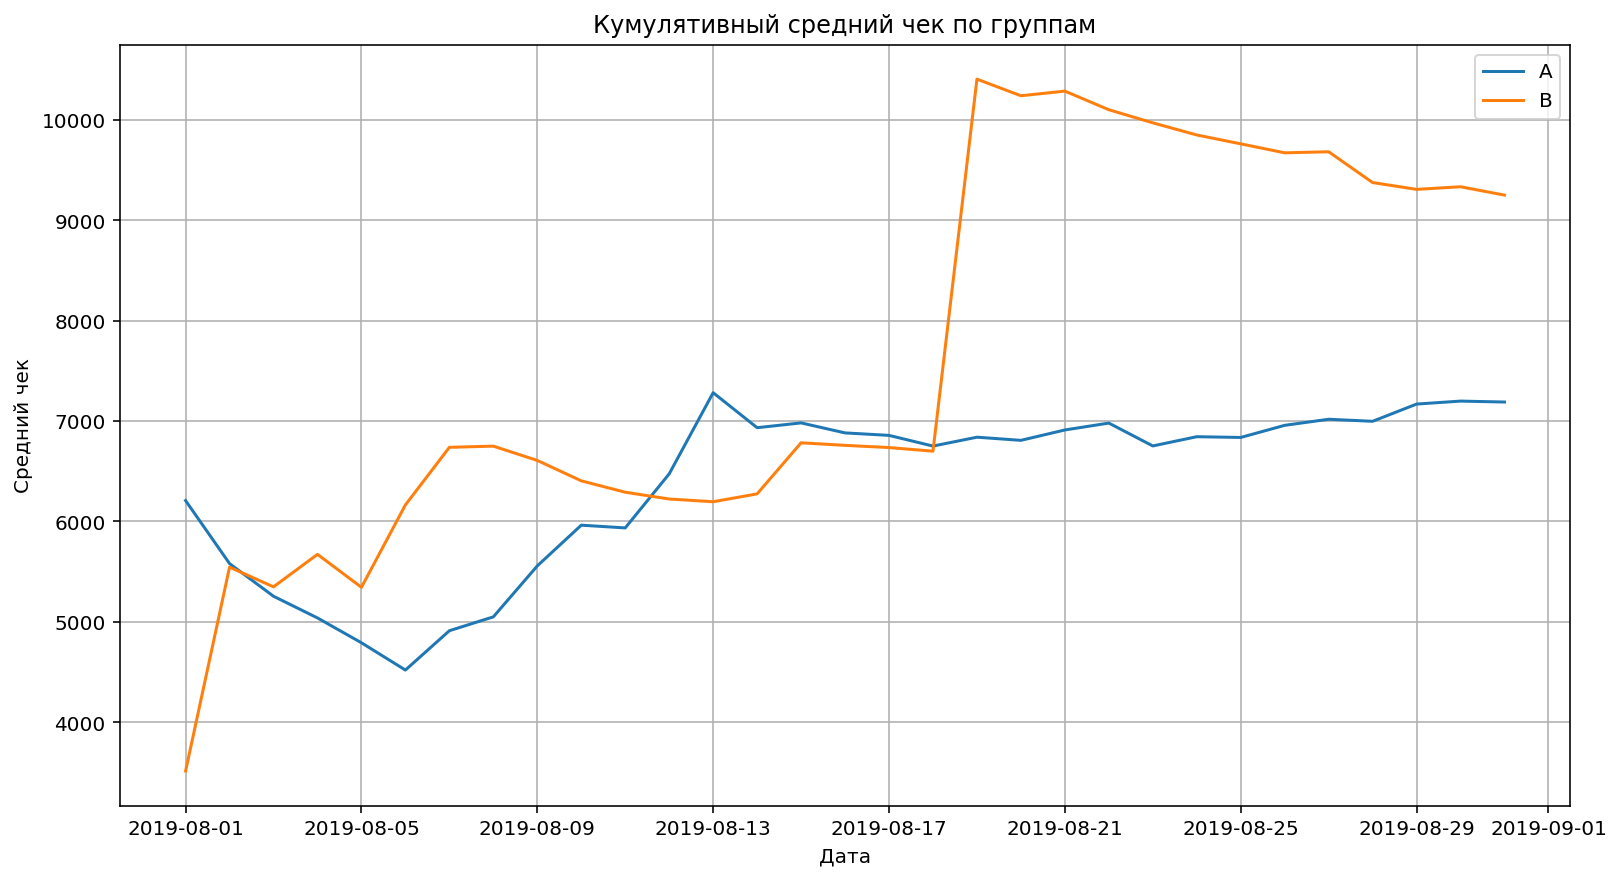

In [16]:
plt.figure(figsize=(13, 7))

plt.plot(cumulativerevenuea['date'], cumulativerevenuea['revenue']/cumulativerevenuea['orders'], label='A')
plt.plot(cumulativerevenueb['date'], cumulativerevenueb['revenue']/cumulativerevenueb['orders'], label='B')

plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid(which='major', axis='both')
plt.title('Кумулятивный средний чек по группам')
plt.legend()
plt.show();

**Промежуточные выводы:**

- кумулятивная средняя выручка группы **B** растет в течение всего теста. Увеличение размера среднего чека у группы **B** повторилось и на данном графике **2019-08-18**, что сигнализирует о всплеске числа заказов или появлении очень дорогих заказов в выборке;
- кумулятивная средняя выручка группы **А** росла до **2019-08-13**, после, на протяжении всего теста она была равна приблизительно **7000**.

Построим график относительного изменения кумулятивного среднего чека группы **B** к группе **A**. Первоначально соберем данные в одной таблице.

In [17]:
mergedcumulativerevenue = (cumulativerevenuea
                           .merge(cumulativerevenueb, 
                                  left_on='date', 
                                  right_on='date', 
                                  how='left', 
                                  suffixes=['a', 'b'])
                          ) # соберем в одну таблицу

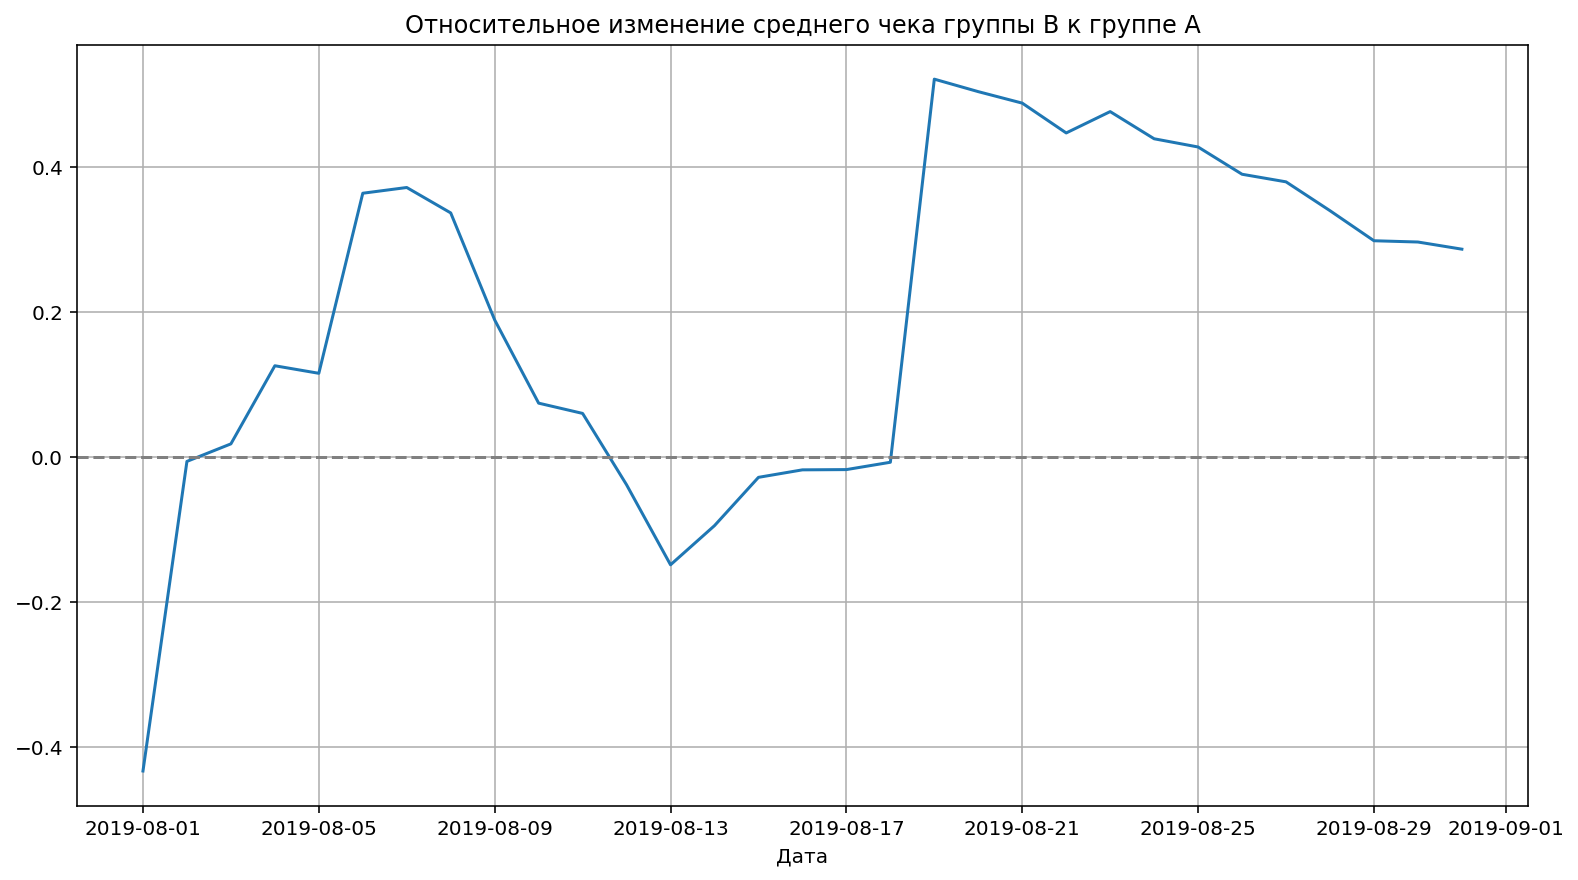

In [18]:
plt.figure(figsize=(13, 7))

plt.plot(
    mergedcumulativerevenue['date'],
    (mergedcumulativerevenue['revenueb']/mergedcumulativerevenue['ordersb'])
    /(mergedcumulativerevenue['revenuea']/mergedcumulativerevenue['ordersa'])-1)

plt.axhline(y=0, color='grey', linestyle='--') 
plt.xlabel('Дата')
plt.grid(which='major', axis='both')
plt.title('Относительное изменение среднего чека группы B к группе A')
plt.show();

**Промежуточные выводы:**

- практически на протяжении всего теста группа **A** стабильно хуже группы **B** по среднему чеку;
- в нескольких точках график различия между сегментами резко "скачет", скорее всего в данных присутствуют крупные заказы и выбросы.

Построим график кумулятивной конверсии по группам. Первоначально посчитаем кумулятивную конверсию по группам.

In [19]:
cumulativedata['conversion'] = cumulativedata['orders'] / cumulativedata['visitors'] # посчитаем кумулятивную конверсию

cumulativedataa = cumulativedata[cumulativedata['group']=='A']
cumulativedatab = cumulativedata[cumulativedata['group']=='B'] # отделяем данные по группам A и B

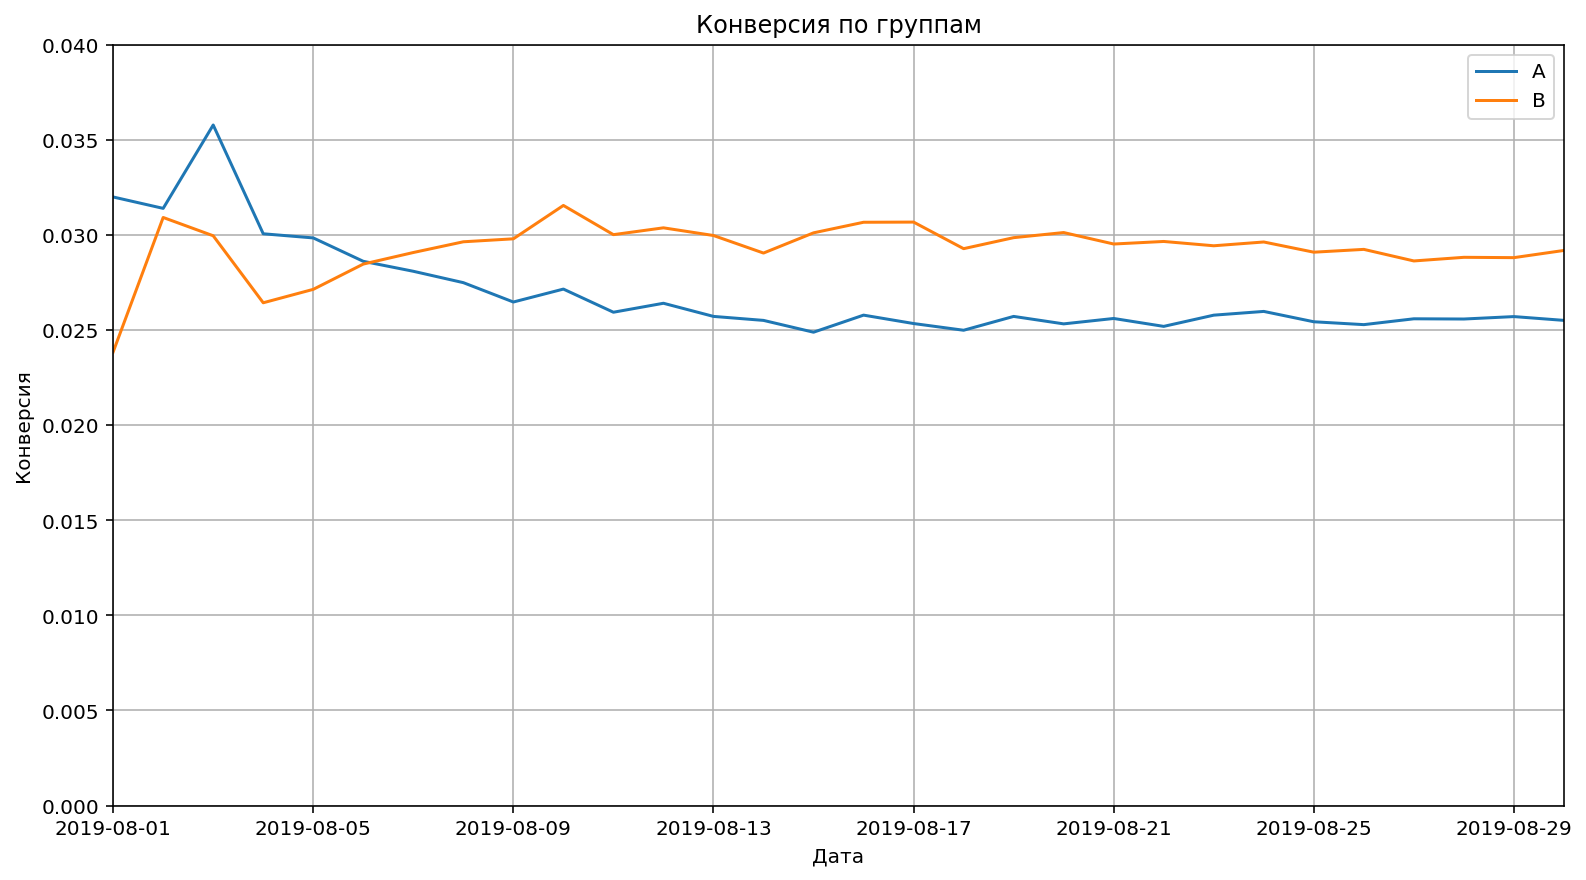

In [20]:
plt.figure(figsize=(13, 7))

plt.plot(cumulativerevenuea['date'], cumulativedataa['conversion'], label='A')
plt.plot(cumulativerevenueb['date'], cumulativedatab['conversion'], label='B')

plt.axis(["2019-08-01", '2019-08-30', 0, 0.040]) 

plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid(which='major', axis='both')
plt.title('Конверсия по группам')
plt.legend()
plt.show();

**Промежуточные выводы:**

- кумулятивная конверсия группы **B** стала выше относительно группы **А** с **2019-08-06** и до конца проведения теста.

Построим график относительного различия кумулятивных конверсий группы **B** к группе **A**.

In [21]:
mergedcumulativeconversions = (cumulativedataa[['date','conversion']]
                               .merge(cumulativedatab[['date','conversion']], 
                                      left_on='date', 
                                      right_on='date', 
                                      how='left', 
                                      suffixes=['a', 'b'])
                              ) # соберем данные в одну таблицу

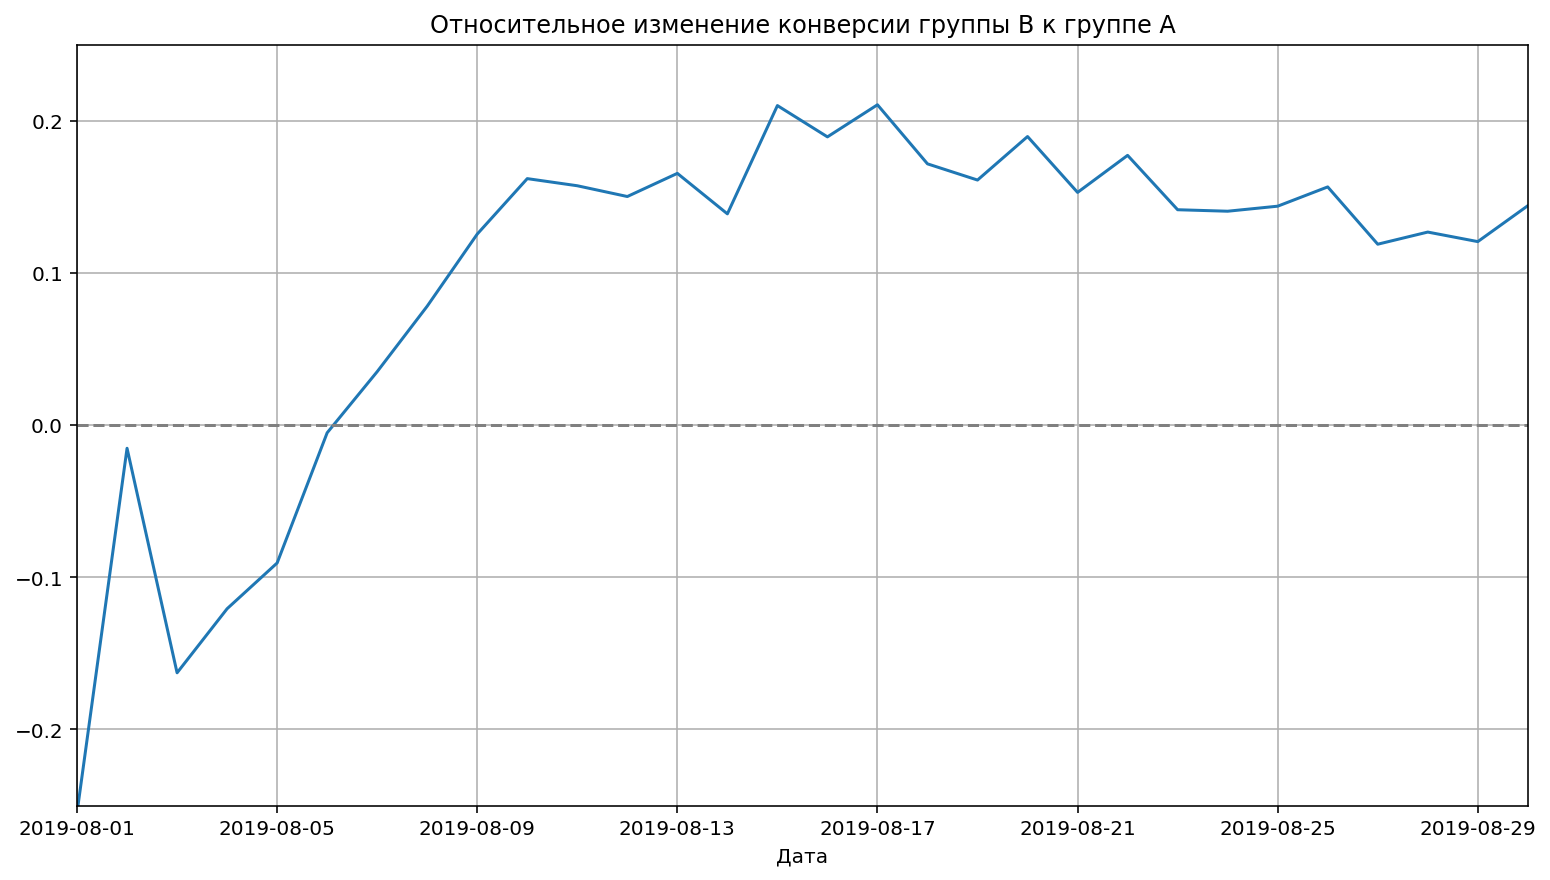

In [22]:
plt.figure(figsize=(13, 7))

plt.plot(
    mergedcumulativeconversions['date'], 
    mergedcumulativeconversions['conversionb']/mergedcumulativeconversions['conversiona']-1)


plt.axhline(y=0, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.grid(which='major', axis='both')
plt.title('Относительное изменение конверсии группы B к группе A')
plt.axis(["2019-08-01", '2019-08-30', -0.25, 0.25])
plt.show();

**Промежуточные выводы:**

- в начале теста группы были приблизительно равны, но с **2019-08-06** группа **B** вырвалась вперед.

### Анализ выбросов и всплесков

Посчитаем количество заказов по пользователям.

In [23]:
orders_by_users = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
) # cгруппируем по id пользователей

orders_by_users.columns = ['userid', 'orders'] # переименуем столбцы

display(orders_by_users.sort_values(by='orders', ascending=False).head(10)) # посмотрим первые 10 строк

,userid,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Семь пользователей с тремя заказами в месяц. Построим точечную диаграмму числа заказов на одного пользователя.

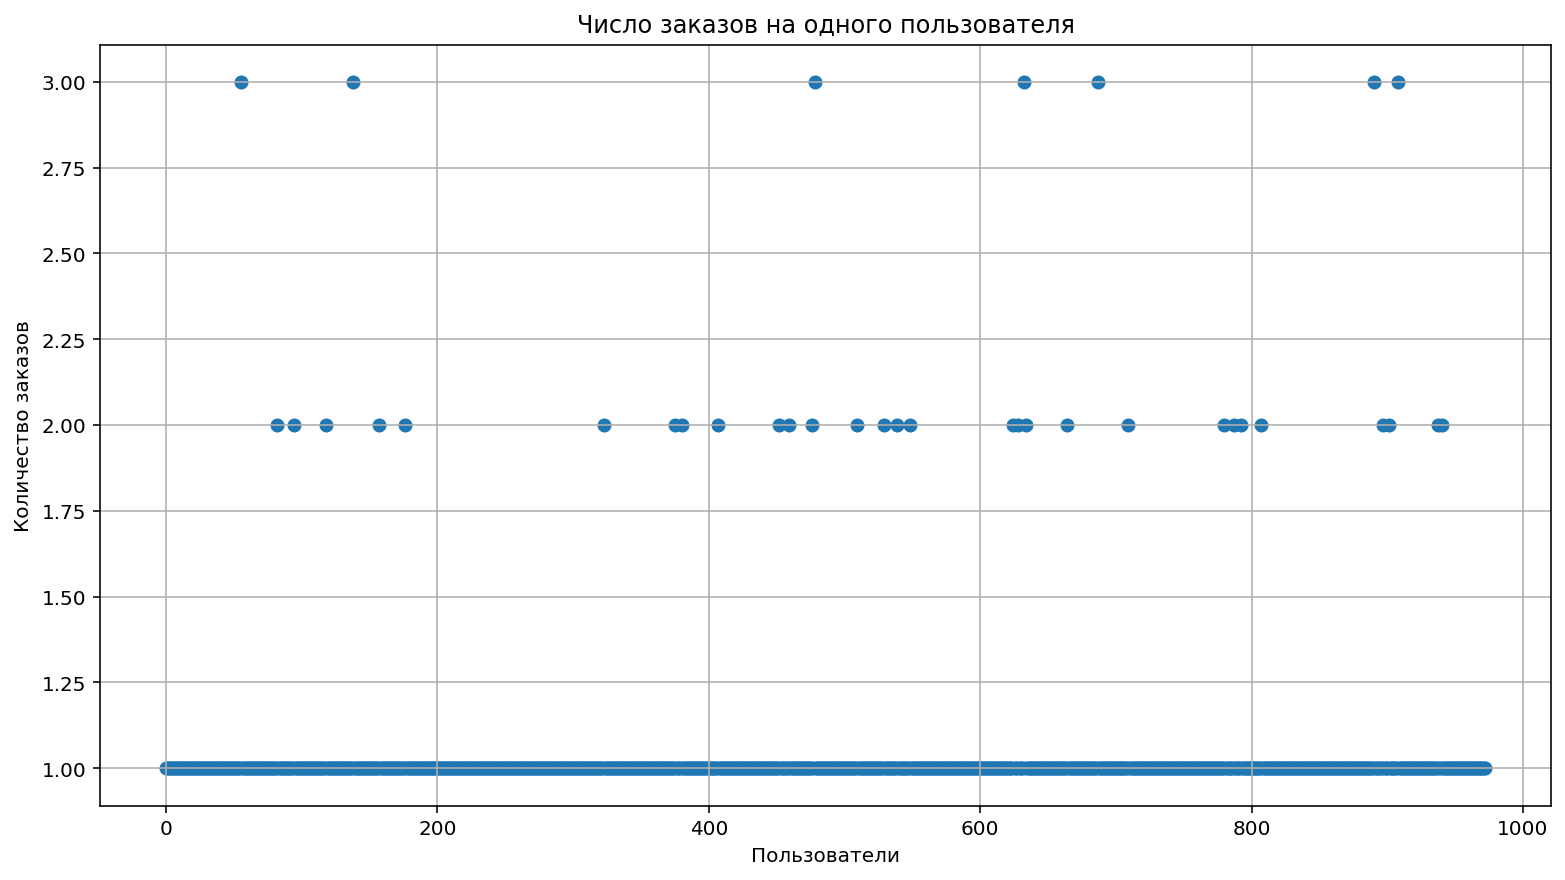

In [24]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(13, 7))
plt.scatter(x_values, orders_by_users['orders'])

plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.grid(which='major', axis='both')
plt.title('Число заказов на одного пользователя')
plt.show();

Далее построим точечный график стоимостей заказов.

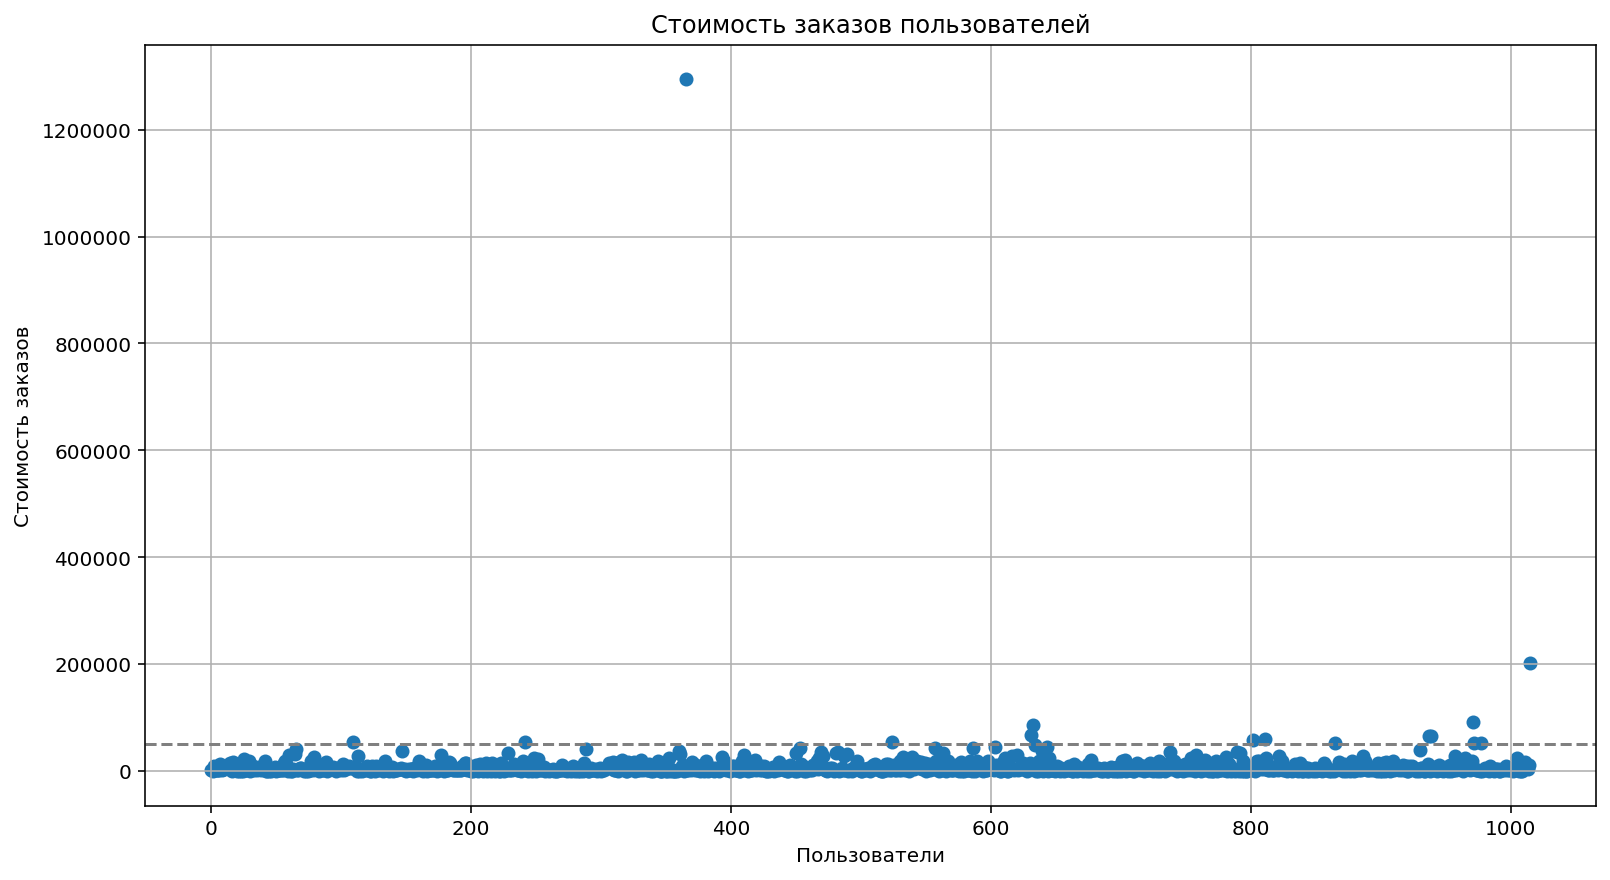

In [25]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(13, 7))
plt.scatter(x_values, orders['revenue'])
plt.axhline(y=50000, color='grey', linestyle='--')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.grid(which='major', axis='both')

plt.title('Стоимость заказов пользователей')
plt.show();

**Промежуточные выводы:**

- большинство пользователей с **1** заказом в месяц;
- не так много пользователей с **2-3** заказами в месяц, далее посчитаем их точную долю;
- по графику можно выбрать границу аномальных заказов приблизительно до **50 000**, далее посчитаем точную долю аномальных заказов;
- фигурирует один аномальный заказ, равный приблизительно **1 300 000**.

Чтобы определить 95-й и 99-й перцентили для количества заказов и стоимости заказов пользователей воспользуемся методом `percentile()`. Также я хочу посмотреть на значения 97-го и 98-го перцентилей.

In [26]:
print(np.percentile(orders_by_users['orders'], [95, 97, 98, 99])) 
# посмотрим перцентили для количества заказов пользователей

[1. 2. 2. 2.]


In [27]:
print(np.percentile(orders['revenue'], [95, 97, 98, 99])) # посмотрим перцентили для стоимости заказов пользователей

[26785. 34792. 42353. 53904.]


**Определение границ аномальных значений:**

- для определения верхней границы пользователей мы выберем 97-ой перцентиль, или **2** заказа;
- для определения верхней границы заказов мы также выберем 98-ой перцентиль, или значение равное **42353**.

### Расчет статистической значимости различий в конверсии и среднем чеке между группами

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным. Начнем с подготовки данных.

In [28]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a'] # выделим из таблицы 'visitors' пользователей группы А

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a'] 
# посчитаем кумулятивное количество пользователей группы А по датам


visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b'] # выделим из таблицы 'visitors' пользователей группы B

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']
# посчитаем кумулятивное количество пользователей группы B по датам

In [29]:
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]
# посчитаем кумулятивные значения заказов и выручки пользователей группы А по датам


orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorid': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]
# посчитаем кумулятивные значения заказов и выручки пользователей группы B по датам

In [30]:
df = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)
# объединим предыдущие таблицы с кумулятивными данными по группам

display(df.head(10)) # посмотрим

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,19,142779,17,59758,19,142779,17,59758,719,713,719,713
1,2019-08-02,18,91602,22,162043,37,234381,39,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,61,346854,53,288850,507,509,1845,1803
3,2019-08-04,11,41176,13,96890,72,388030,66,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,94,474413,87,475648,756,707,3318,3280
5,2019-08-06,12,40919,22,214842,106,515332,109,690490,667,655,3985,3935
6,2019-08-07,16,123248,23,219164,122,638580,132,909654,644,709,4629,4644
7,2019-08-08,14,88639,22,150141,136,727219,154,1059795,610,654,5239,5298
8,2019-08-09,11,134237,19,103166,147,861456,173,1162961,617,610,5856,5908
9,2019-08-10,15,152275,22,105162,162,1013731,195,1268123,406,369,6262,6277


Посчитаем статистическую значимость различия в конверсии между группами.

In [31]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']
# выделим пользователей группы А, который заказывали хотя бы 1 раз

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders']
# выделим пользователей группы B, который заказывали хотя бы 1 раз

Объявим переменные **sample_a** и **sample_b**, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [32]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Сформулируем нулевую и альтернативную гипотезы:**

H0: Конверсия группы **А** равна конверсии группы **B**.

H1: Конверсия группы **А** не равна конверсии группы **B**.


Применим тест Манна-Уитни, чтобы посчитать статистическую значимость различия конверсии по результатам теста.

In [33]:
print("{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

0.006
0.160


**Промежуточные выводы:**

- p-value значительно меньше 0.05, это означает что мы отвергаем нулевую гипотезу. В конверсии между группами есть статистически значимые различия;
- относительный прирост конверсии группы **B** к конверсии **A** равен **16%**.

Далее найдем относительные различия в среднем чеке между группами.


**Сформулируем нулевую и альтернативную гипотезы:**

H0: Средний чек группы **А** равен среднему чеку группы **B**.

H1: Средний чек группы **А** не равен среднему чеку группы **B**.

In [34]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.415
0.287


**Промежуточные выводы:**

- p-value значительно больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет, не отвергаем;
- впрочем, средний чек группы B значительно выше среднего чека группы A (на **28,7%**).

Примем за аномальных пользователей тех, кто совершил более **2** заказов или совершил заказ дороже **42 353**. Сделаем срезы пользователей с числом заказов больше **2** — **users_with_many_orders** и пользователей, совершивших заказы дороже **42 353** — **users_with_expensive_orders**. Объединим их в таблице **abnormal_users**.

In [35]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['user_id'],
    ],
    axis=0,
) # выделим пользователей более чем с двумя заказами

users_with_expensive_orders = orders[orders['revenue'] > 42353]['visitorid']
# выделим пользователей с заказами больше чем 42 353

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
) # объединим таблицы


abnormal_users.shape # посмотрим количество

(28,)

**28** аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [36]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Сформулируем нулевую и альтернативную гипотезы:**

H0: Конверсия по "очищенным" данным группы **А** равна конверсии по "очищенным" данным группы **B**.

H1: Конверсия по "очищенным" данным группы **А** не равна конверсии по "очищенным" данным группы **B**.

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [37]:
print('{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

print('{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

0.002
0.209


**Промежуточные выводы:**

- p-value практически не изменилось, отвергаем нулевую гипотезу;
- разница между сегментами увеличилась с **16%** до **20,9%**.

Результаты по конверсии практически не изменились. Узнаем, произошло ли что-нибудь с результатами по среднему чеку.

**Сформулируем нулевую и альтернативную гипотезы:**

H0: Средний чек по "очищенным" данным группы **А** равен среднему чеку по "очищенным" данным группы **B**.

H1: Средний чек по "очищенным" данным группы **А** не равен среднему чеку по "очищенным" данным группы **B**.

In [38]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.429
0.079


**Промежуточные выводы:**

- p-value практически не изменилось, не можем отвергнуть нулевую гипотезу;
- разница между сегментами сократилась с **28,7%** до **7,9%**.

## Принятие решений по результатам теста

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- По среднему чеку нет статистически значимого различия как по сырым данным, так и после фильтрации аномалий.
- График различия конверсии между группами показал, что результаты группы **B** лучше группы **A**: имеют тенденцию к росту, либо зафиксировались около среднего значения.
- График различия среднего чека сообщает, что результат группы **В** лучше группы **А**, при этом он колеблется, что позволило нам найти аномалии.

**Необходимо остановить тест, зафиксировать победу группы В.**

Группа **В** статистически значимо лучше группы **А** по одной метрике и график конверсии говорит о фиксации результата.